In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Globally setting print options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('/content/drive/Shareddrives/DATA240 - Data Mining/Modeling and Evaluation/preprocessed_data.csv')
data.head()

,Little_interest_in_doing_things,Feeling_down_or_depressed,Trouble_sleeping_or_sleeping_too_much,Feeling_tired_or_having_little_energy,Poor_appetite_or_overeating,Feeling_bad_about_yourself,Trouble_concentrating_on_things,Moving_or_speaking_slowly_or_too_fast,Thought_you_would_be_better_off_dead,No_of_hours_you_sleep,How_often_do_you_snore,How_often_do_you_snort/stop_breathing,trouble_sleeping,Sleep_Apnea,Blood_pressure,Taking_Medication_for_HBP,current_drinker,past_drinker,current_smoker,past_smoker,Gender,Age,Education_Level,Pregnant,PIR,Race_Non-Hispanic Black,Race_Non-Hispanic White,Race_Other Hispanic,Marital_Status_Married/Living with Partner,Marital_Status_Never Married,depression_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,2,85,3,0.0,1.99,0,1,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0,2,44,3,0.0,4.65,0,1,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,70,4,0.0,5.00,0,1,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0,1,73,2,0.0,2.15,0,1,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,21,2,0.0,0.46,0,1,0,0,1,0


In [4]:
data.shape

(24108, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24108 entries, 0 to 24107
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Little_interest_in_doing_things             24108 non-null  float64
 1   Feeling_down_or_depressed                   24108 non-null  float64
 2   Trouble_sleeping_or_sleeping_too_much       24108 non-null  float64
 3   Feeling_tired_or_having_little_energy       24108 non-null  float64
 4   Poor_appetite_or_overeating                 24108 non-null  float64
 5   Feeling_bad_about_yourself                  24108 non-null  float64
 6   Trouble_concentrating_on_things             24108 non-null  float64
 7   Moving_or_speaking_slowly_or_too_fast       24108 non-null  float64
 8   Thought_you_would_be_better_off_dead        24108 non-null  float64
 9   No_of_hours_you_sleep                       24108 non-null  float64
 10  How_often_

In [6]:
# Check for duplicates

data.duplicated().sum()

27

In [7]:
# Remove duplicate rows
data = data.drop_duplicates()

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

Little_interest_in_doing_things               0
Feeling_down_or_depressed                     0
Trouble_sleeping_or_sleeping_too_much         0
Feeling_tired_or_having_little_energy         0
Poor_appetite_or_overeating                   0
Feeling_bad_about_yourself                    0
Trouble_concentrating_on_things               0
Moving_or_speaking_slowly_or_too_fast         0
Thought_you_would_be_better_off_dead          0
No_of_hours_you_sleep                         0
How_often_do_you_snore                        0
How_often_do_you_snort/stop_breathing         0
trouble_sleeping                              0
Sleep_Apnea                                   0
Blood_pressure                                0
Taking_Medication_for_HBP                     0
current_drinker                               0
past_drinker                                  0
current_smoker                                0
past_smoker                                   0
Gender                                  

### Split data into X and y

In [10]:
y = data['depression_category']
X = data.drop(columns=['depression_category'])

In [11]:
X.shape, y.shape

((24081, 30), (24081,))

### Handling class imbalance - SMOTENC Oversampling

In [12]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, SMOTENC

# oversampling techniques

def oversample_data(X, y, method='smote', sampling_strategy='auto', random_state=42):
    if method == 'smote':
        oversampler = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'borderline':
        oversampler = BorderlineSMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'adasyn':
        oversampler = ADASYN(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'smotenc':
        categorical_features = [True] * X.shape[1]
        categorical_features[1] = False
        oversampler = SMOTENC(sampling_strategy=sampling_strategy, categorical_features=categorical_features, random_state=random_state)
    else:
        raise ValueError("Invalid oversampling method")

    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    return X_resampled, y_resampled

In [13]:
sampling_strategy = 'auto'
X_os,y_os = oversample_data(X, y, method='smote', sampling_strategy=sampling_strategy)

In [14]:
X_os.shape, y_os.shape

((55884, 30), (55884,))

### Train test split

In [15]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_os, y_os, test_size=0.2, random_state=2)

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=2)

In [17]:
print('train data(X_train,y_train) shape: ',X_train.shape, y_train.shape)
print('validation data(X_valid,y_valid) shape: ',X_valid.shape, y_valid.shape)
print('test data(X_test,y_test) shape: ',X_test.shape, y_test.shape)

train data(X_train,y_train) shape:  (35765, 30) (35765,)
validation data(X_valid,y_valid) shape:  (8942, 30) (8942,)
test data(X_test,y_test) shape:  (11177, 30) (11177,)


### LR Baseline

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize the logistic regression model
model = LogisticRegression(multi_class='ovr')  # Use 'ovr' for one-vs-rest approach suitable for multiclass

# Create a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), model)

# Train the model on training data
pipeline.fit(X_train, y_train)

# Predict probabilities on the validation data
y_pred_baseline_LR = pipeline.predict(X_valid)

In [59]:
import matplotlib.pyplot as plt
from sklearn import metrics

def metrics_calculation(y_actual, y_predicted, plot_roc_curve=True):
    # Classification report
    class_report=metrics.classification_report(y_actual,y_predicted)
    print("Classification report:\n",class_report)

    # Confusion Matrix
    conf_mat = metrics.confusion_matrix(y_actual,y_predicted,labels=None)
    print("Confusion Matrix:\n",conf_mat)

    # Confusion Matrix Display
    conf_display=metrics.ConfusionMatrixDisplay(conf_mat)
    conf_display.plot()
    plt.show()

    # Accuracy
    accuracy =metrics.accuracy_score(y_actual, y_predicted)
    print("Accuracy:",accuracy)

    # precision
    precision=metrics.precision_score(y_actual, y_predicted, average='weighted')
    print("Precision:",precision)

    # Recall
    recall=metrics.recall_score(y_actual, y_predicted, average='weighted')
    print("Recall:",recall)

    # sensitivity
    sensitivity = conf_mat[1, 1] / (conf_mat[1,1] + conf_mat[1,0])
    print("Sensitivity:",sensitivity)

    # specificity
    specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
    print("Specificity:",specificity)

    # f1-score
    f1_score = metrics.f1_score(y_actual,y_predicted, average='weighted')
    print("F1-Score:",f1_score)

    # Cohen's Kappa score
    Kappa_score= metrics.cohen_kappa_score(y_actual,y_predicted)
    print("Cohen Kappa Score:",Kappa_score)

    # G-measure
    g_measure=2*(precision*recall)/(precision+recall)
    print("G_measure:",g_measure)

    # Informedness/Youdens statistic
    informedness=sensitivity+specificity-1
    print("Informedness/Youdens statistic:",informedness)

    # Positive predictive Value
    ppv= conf_mat[1,1] / (conf_mat[1,1] + conf_mat[0,1])
    print("PPV:",ppv)

     #Negative predictive Value
    npv= conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[1,0])
    print("NPV:",npv)

    # Markedness
    marked=ppv+npv-1
    print("Markedness:",marked)

    # Matthews Correlation Coefficient
    mcc=((conf_mat[0, 0] * conf_mat[1, 1]) - (conf_mat[0, 1] * conf_mat[1, 0]))/np.sqrt((conf_mat[0, 0] + conf_mat[0, 1])
        * (conf_mat[0, 0] + conf_mat[1, 0]) * (conf_mat[1, 1] + conf_mat[1, 0]) * (conf_mat[1, 1] + conf_mat[0, 1]))
    print("Matthews Correlation Coefficient",mcc)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2927
           1       1.00      1.00      1.00      3006
           2       1.00      1.00      1.00      3009

    accuracy                           1.00      8942
   macro avg       1.00      1.00      1.00      8942
weighted avg       1.00      1.00      1.00      8942

Confusion Matrix:
 [[2927    0    0]
 [   0 3002    4]
 [   2    0 3007]]


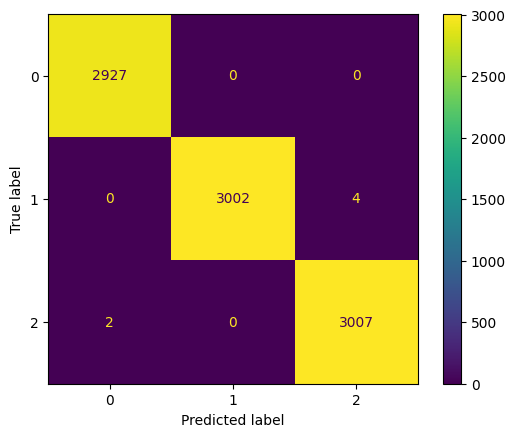

Accuracy: 0.9993290091702081
Precision: 0.9993294590224129
Recall: 0.9993290091702081
Sensitivity: 1.0
Specificity: 1.0
F1-Score: 0.9993290099138752
Cohen Kappa Score: 0.998993434964158
G_measure: 0.9993292340962598
Informedness/Youdens statistic: 1.0
PPV: 1.0
NPV: 1.0
Markedness: 1.0
Matthews Correlation Coefficient 1.0


In [60]:
metrics_calculation(y_valid, y_pred_baseline_LR, True)

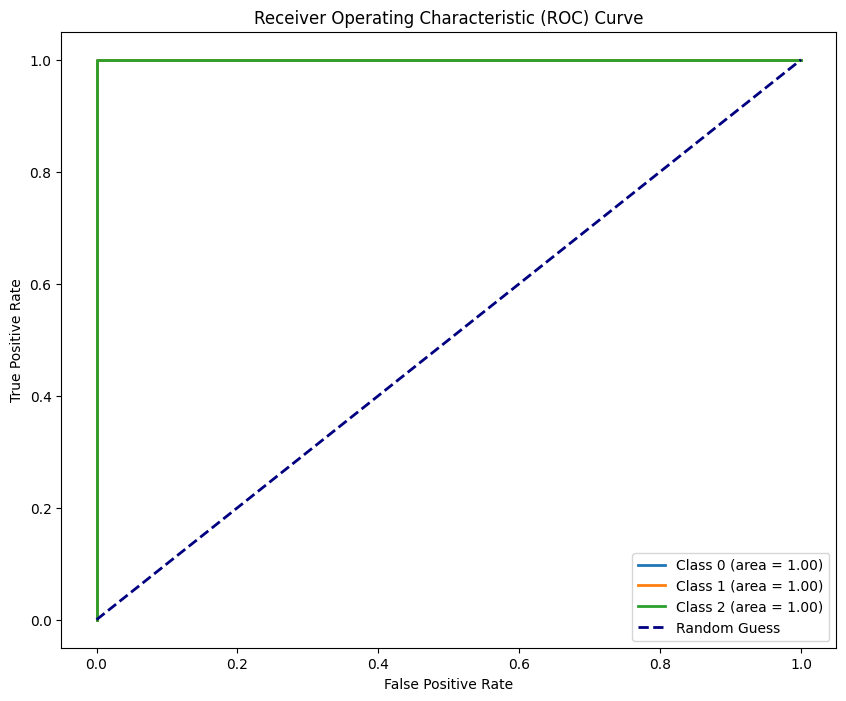


Overall ROC-AUC Score: 0.9998857118708265


In [61]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Binarizing the output labels for multi-class
classes = np.unique(y_train)
y_valid_binarized = label_binarize(y_valid, classes=classes)

# Calculate the probability estimates for each class
y_pred_proba_LR = pipeline.predict_proba(X_valid)

# Calculate the ROC-AUC score using one-vs-rest (OVR) method
roc_auc = roc_auc_score(y_valid_binarized, y_pred_proba_LR, multi_class='ovr')

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_valid_binarized[:, i], y_pred_proba_LR[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_name} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("\nOverall ROC-AUC Score:", roc_auc)

### Hyperparameter tuning and Cross Validation

In [72]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a logistic regression model with cross-validation
# Cs represents the inverse of regularization strength; smaller values specify stronger regularization.
# cv is the number of cross-validation folds
# 'liblinear' solver supports OVA for multiclass problems
model_cv = LogisticRegressionCV(Cs=10, cv=5, solver='liblinear', penalty='l1', multi_class='ovr')

# Scale features before logistic regression, especially when using regularization
pipeline = make_pipeline(StandardScaler(), model_cv)

# Train the model on the entire training set (including X_valid, y_valid for hyperparameter tuning via CV)
pipeline.fit(X_train, y_train)

# Predict the model on the validation set
y_pred_cv = pipeline.predict(X_valid)

# Print the best C - reg strength value found and the accuracy on the validation set
print("Best C value:", model_cv.C_)
print("Validation accuracy:", pipeline.score(X_valid, y_valid))

Best C value: [ 21.5443469  166.81005372   2.7825594 ]
Validation accuracy: 1.0


In [73]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a logistic regression model with cross-validation
# Cs represents the inverse of regularization strength; smaller values specify stronger regularization.
# cv is the number of cross-validation folds
# 'liblinear' solver supports OVA for multiclass problems
model_cv = LogisticRegressionCV(Cs=10, cv=5, solver='liblinear', penalty='l2', multi_class='ovr')

# Scale features before logistic regression, especially when using regularization
pipeline = make_pipeline(StandardScaler(), model_cv)

# Train the model on the entire training set (including X_valid, y_valid for hyperparameter tuning via CV)
pipeline.fit(X_train, y_train)

# Predict the model on the validation set
y_pred_cv = pipeline.predict(X_valid)

# Print the best C - reg strength value found and the accuracy on the validation set
print("Best C value:", model_cv.C_)
print("Validation accuracy:", pipeline.score(X_valid, y_valid))

Best C value: [1.66810054e+02 5.99484250e-03 1.66810054e+02]
Validation accuracy: 1.0


### Testing LR with optimal hyperparameters on unseen data

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

best_C_values = np.array([ 21.5443469,  166.81005372,   2.7825594 ])

# Initialize a logistic regression model with the best C values found from CV
model_final = LogisticRegression(C=np.mean(best_C_values), multi_class='ovr', solver='liblinear')

# Create a pipeline with scaling and logistic regression
pipeline_final = make_pipeline(StandardScaler(), model_final)

# Assuming that X_train_complete and y_train_complete represent the full training dataset (including validation data)
pipeline_final.fit(X_train, y_train)

# Predict the model on test data
y_pred_test = pipeline_final.predict(X_test)

In [75]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color='orange')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='orange', label='Validation Score')
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

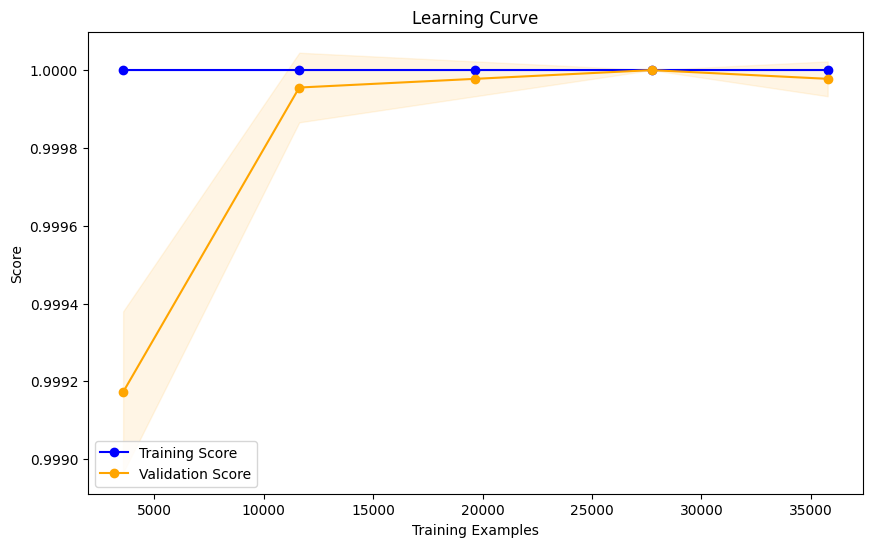

In [76]:
test_model = pipeline_final.fit(X_train_full, y_train_full)
plot_learning_curve(test_model, X_train_full, y_train_full, cv=5)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3815
           1       1.00      1.00      1.00      3720
           2       1.00      1.00      1.00      3642

    accuracy                           1.00     11177
   macro avg       1.00      1.00      1.00     11177
weighted avg       1.00      1.00      1.00     11177

Confusion Matrix:
 [[3815    0    0]
 [   0 3720    0]
 [   0    0 3642]]


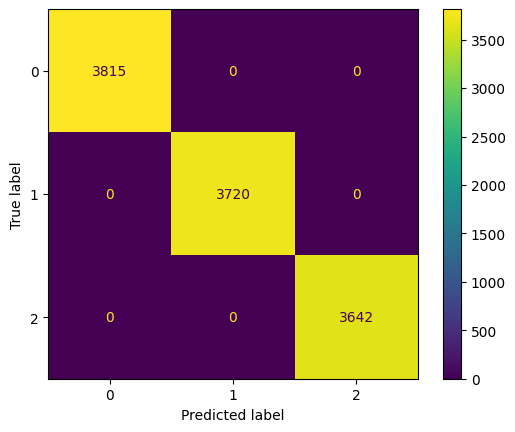

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Sensitivity: 1.0
Specificity: 1.0
F1-Score: 1.0
Cohen Kappa Score: 1.0
G_measure: 1.0
Informedness/Youdens statistic: 1.0
PPV: 1.0
NPV: 1.0
Markedness: 1.0
Matthews Correlation Coefficient 1.0


In [77]:
metrics_calculation(y_test, y_pred_test, True)

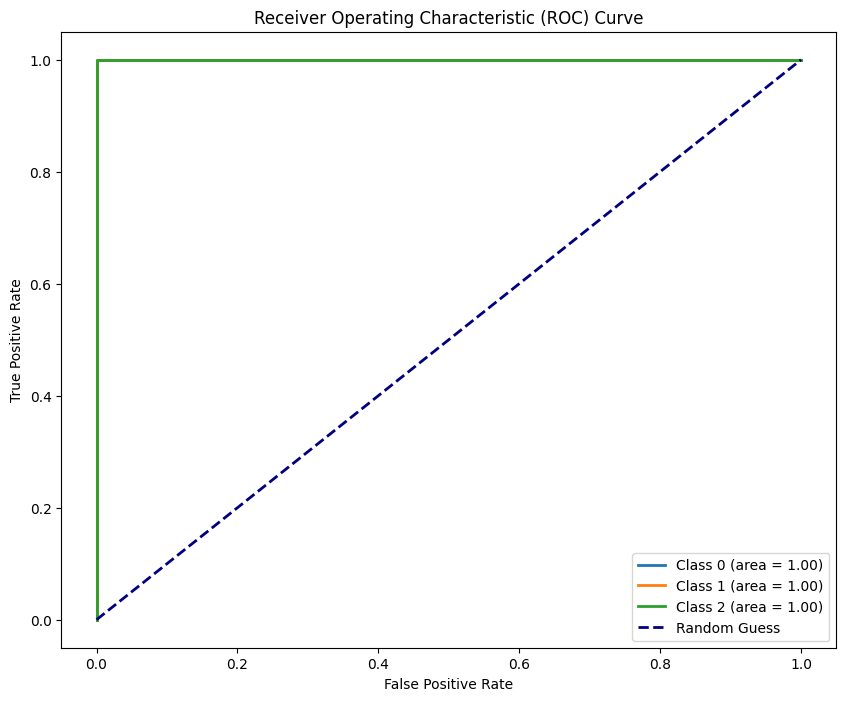


Overall ROC-AUC Score: 1.0


In [78]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarizing the output labels for multi-class
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# Calculate the probability estimates for each class
y_pred_proba_LR = pipeline_final.predict_proba(X_test)

# Calculate the ROC-AUC score using one-vs-rest (OVR) method
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba_LR, multi_class='ovr')

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba_LR[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_name} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("\nOverall ROC-AUC Score:", roc_auc)